CLUSTERIN ALL TRAFFIC

In [458]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math


In [459]:
data = pd.read_csv('clustering_1.csv')
data.drop(['@timestamp'], inplace=True, axis = 'columns')
data.head()

,destination.ip,destination.port,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,source.port,source.ip,network.transport,network.type
0,172.31.91.217,22,"123,300",141,"1,140,356,367,865","133,212",285,"9,912",144,"34,179",193.146.78.93,tcp,ipv4
1,34.238.162.185,"9,200","547,054",578,"1,140,098,665,211","2,934,616","1,672","2,387,562","1,094","38,310",172.21.0.2,tcp,ipv4
2,34.238.162.185,"9,200","273,527",289,"1,140,098,633,856","1,467,308",836,"1,193,781",547,"38,310",172.31.91.217,tcp,ipv4
3,34.238.162.185,"9,200","19,073,884","5,734","1,140,094,145,161","108,722,289","17,228","89,648,405","11,494","40,992",172.31.91.217,tcp,ipv4
4,192.168.17.11,"35,220","9,414",96,"1,140,095,773,053","22,228",242,"12,814",146,"5,671",192.168.17.17,tcp,ipv4


PREPROCESSING

In [460]:
# Eliminamos las variables de poco interes
data_all = data.iloc[5630:15360]
data_ini = data_all.copy()
data_all.drop(['destination.port', 'source.port', 'destination.ip', 'source.ip', 'network.type', 'network.transport'], axis = 'columns', inplace=True)
len_col = data_all.shape[1]
len_row = data_all.shape[0]


/Users/onintzaugarte/opt/anaconda3/envs/machinglearning/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [461]:
#check dimen pre
data_all.shape


(9730, 7)

In [462]:
#Eliminamos las variables que tienen mas de un 80% de valores nan
name = data_all.columns.values.tolist()
for i in range(len_col):
    cc = data_all[name[i]].isnull().sum()
    condition = (cc/len_row)
    if (condition > 0.8):
        data_all.drop([name[i]], axis = 'columns', inplace = True)
#Eliminamos las filas con nan
data_all = data_all.dropna()   
data_ini = data_ini.dropna()
post = data_all.shape    

In [463]:
#check dimen post
data_all.shape

(9602, 7)

In [464]:
#check nan
pd.isnull(data_all).sum() > 0

destination.bytes      False
destination.packets    False
event.duration         False
network.bytes          False
network.packets        False
source.bytes           False
source.packets         False
dtype: bool

In [465]:
# Remove commas
name2 = data_all.columns.values.tolist()
len_col2=len(name2)

for i in range(len_col2):
    data_all[name2[i]].replace(',','',regex=True,inplace=True)
    data_ini[name2[i]].replace(',','',regex=True,inplace=True)


In [466]:
#Proprocessed csv
data_all.to_csv (r'work_data_prepro.csv', index = None, header=True)
print("Dataframe preprocessed")
data_all

Dataframe preprocessed


,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets
5630,2840,12,934325235,4006,24,1166,12
5631,152,2,179059,440,6,288,4
5632,1154,12,5969612,2320,24,1166,12
5633,11094,30,2768186,23428,66,12334,36
5634,1018,10,521666103,2320,24,1302,14
...,...,...,...,...,...,...,...
15355,152,2,929178,440,6,288,4
15356,3988,8,1072930828,5638,20,1650,12
15357,7976,16,1073019699,11276,40,3300,24
15358,11094,30,5027077,23592,66,12498,36


CLUSTERING

In [467]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
#data.drop(['network.transport'], axis = 'columns', inplace=True)


In [468]:
# Clustering Dataframe X
X = data_all.copy()
X = X.astype("int64")
name_post_clust = data_all.columns.values.tolist()




In [469]:
#Standardization
X_standarized = StandardScaler().fit_transform(X)
standarized_df = pd.DataFrame(data=X_standarized, columns=name_post_clust)
standarized_df.describe()
#standarized_df.head(6)

,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets
count,9.602000e+03,9602.000000,9.602000e+03,9.602000e+03,9.602000e+03,9.602000e+03,9.602000e+03
mean,-2.959978e-18,0.000000,-3.551974e-17,3.699973e-18,-3.255976e-17,-1.479989e-18,-8.879934e-18
std,1.000052e+00,1.000052,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00
min,-1.184738e-01,-0.308808,-6.033750e-01,-6.956430e-02,-2.846243e-01,-5.865002e-02,-2.578045e-01
25%,-1.183948e-01,-0.307968,-6.033743e-01,-6.950382e-02,-2.830535e-01,-5.859379e-02,-2.556405e-01
50%,-1.039927e-01,-0.284431,-6.032765e-01,-6.406296e-02,-2.594907e-01,-5.513744e-02,-2.325577e-01
75%,-1.321096e-02,0.085431,4.116667e-01,-3.849018e-02,7.902680e-02,-4.363810e-02,7.184631e-02
max,2.309714e+01,20.219404,4.319491e+00,2.368722e+01,1.889620e+01,2.372932e+01,1.735796e+01


In [470]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=50).fit(X_standarized) # eps = radio , min_samples = muestras minimas
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#print info
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))


Estimated number of clusters: 2
Estimated number of noise points: 267
Silhouette Coefficient: 0.685


0
1
-1


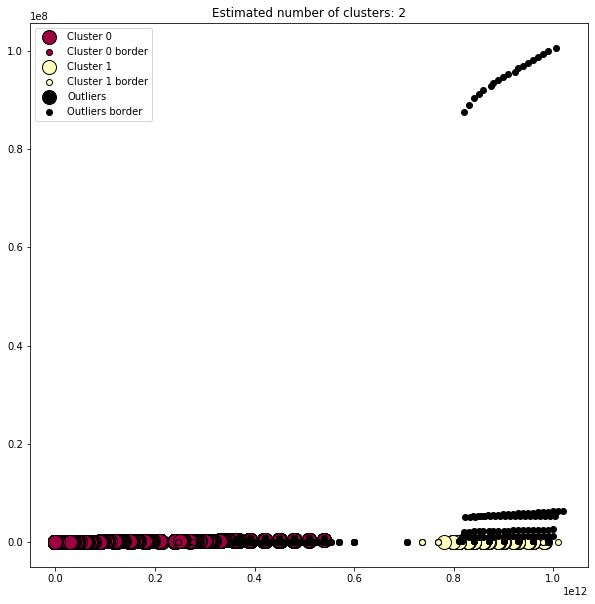

In [471]:
# Plot result DBSCAN
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
legend_labels = list()
for k, col in zip(unique_labels, colors):
    print(k)
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        legend_labels.append("Outliers")
        legend_labels.append("Outliers border")
    else:
        legend_labels.append("Cluster "+str(k))
        legend_labels.append("Cluster "+str(k)+" border")

    class_member_mask = (labels == k)

    xy = X.values[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    
    xy = X.values[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)


plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.legend(legend_labels)
plt.show()

In [472]:
# % outliers/ruido
outliers = (X_standarized[labels==-1].shape[0]/X_standarized[labels!=-1].shape[0])*100
print(round(outliers,2), '%')

2.86 %


In [473]:
# Dataframe create
X_outlier = data_ini[labels == -1]
X_clust = data_ini[labels != -1]
Xcluster = {}
for i in range(n_clusters_):
    Xcluster["cluster{0}".format(i)] = data_ini[labels == i]

x_outlier_df = pd.DataFrame(data=X_outlier, columns = data_ini.columns)
x_clust_df = pd.DataFrame(data=X_clust, columns = data_ini.columns)

In [474]:
def plot_cluster(data, num_cluster, columns):
    # Plot result DBSCAN

    plt.figure(figsize=(10,10))
    # Black removed and is used for noise instead.
    legend_labels = list()

    legend_labels.append("Cluster"+str(num_cluster))
    legend_labels.append("Cluster "+ str(num_cluster)+ " Border")


    xy = data[columns].values
    xy = xy.astype("int64")
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor='r',
             markeredgecolor='k', markersize=14)


    plt.title('Cluster '+str(num_cluster))
    plt.legend(legend_labels)
    return plt

# Cluster 0

In [475]:
Xcluster["cluster0"]

,destination.ip,destination.port,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,source.port,source.ip,network.transport,network.type
5630,192.168.17.12,"13,001",2840,12,934325235,4006,24,1166,12,"32,848",192.168.17.3,tcp,ipv4
5631,192.168.17.16,"13,006",152,2,179059,440,6,288,4,"43,190",192.168.17.3,tcp,ipv4
5632,192.168.17.11,"13,002",1154,12,5969612,2320,24,1166,12,"57,188",192.168.17.18,tcp,ipv4
5633,192.168.17.17,"5,671",11094,30,2768186,23428,66,12334,36,"59,150",192.168.17.11,tcp,ipv4
5634,192.168.17.13,"13,005",1018,10,521666103,2320,24,1302,14,"33,244",192.168.17.18,tcp,ipv4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15355,192.168.17.2,"13,004",152,2,929178,440,6,288,4,"38,260",192.168.17.3,tcp,ipv4
15356,172.31.91.217,"14,000",3988,8,1072930828,5638,20,1650,12,"36,272",193.146.78.93,tcp,ipv4
15357,192.168.17.3,"14,000",7976,16,1073019699,11276,40,3300,24,"36,272",193.146.78.93,tcp,ipv4
15358,192.168.17.17,"5,671",11094,30,5027077,23592,66,12498,36,"44,382",192.168.17.2,tcp,ipv4


Destination IPs seem to be private IPs, despite one of them.
Destination ports are microservices ports, RabbitMQ and NTP.
Source IPs are all private IPs. Source ports seem to be randomly generated ports.


In [476]:
print("Destination IPs: "+Xcluster["cluster0"]["destination.ip"].unique())
print("Destination Ports: "+Xcluster["cluster0"]["destination.port"].unique())
print("Source IPs: "+Xcluster["cluster0"]["source.ip"].unique())
print("Source Ports: "+Xcluster["cluster0"]["source.port"].unique())

['Destination IPs: 192.168.17.12' 'Destination IPs: 192.168.17.16'
 'Destination IPs: 192.168.17.11' 'Destination IPs: 192.168.17.17'
 'Destination IPs: 192.168.17.13' 'Destination IPs: 172.31.91.217'
 'Destination IPs: 192.168.17.3' 'Destination IPs: 192.168.17.14'
 'Destination IPs: 192.168.17.2' 'Destination IPs: 169.254.169.123']
['Destination Ports: 13,001' 'Destination Ports: 13,006'
 'Destination Ports: 13,002' 'Destination Ports: 5,671'
 'Destination Ports: 13,005' 'Destination Ports: 14,000'
 'Destination Ports: 13,003' 'Destination Ports: 13,004'
 'Destination Ports: 123' 'Destination Ports: 50,680'
 'Destination Ports: 47,792']
['Source IPs: 192.168.17.3' 'Source IPs: 192.168.17.18'
 'Source IPs: 192.168.17.11' 'Source IPs: 192.168.17.13'
 'Source IPs: 192.168.17.12' 'Source IPs: 193.146.78.93'
 'Source IPs: 192.168.17.14' 'Source IPs: 192.168.17.2'
 'Source IPs: 172.31.91.217']
['Source Ports: 32,848' 'Source Ports: 43,190' 'Source Ports: 57,188' ...
 'Source Ports: 32,882'

In [477]:
xcluster_numeric = Xcluster["cluster0"][name2]
xcluster_numeric = xcluster_numeric.astype("int64")
xcluster_numeric.describe()

,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets
count,9172.000000,9172.000000,9.172000e+03,9172.000000,9172.000000,9172.000000,9172.000000
mean,46403.827628,285.756542,9.405554e+10,75658.323812,531.022896,29254.496184,245.266354
std,70475.944082,458.927814,1.475797e+11,110090.772642,830.859972,40335.138111,372.987934
min,92.000000,1.000000,2.858500e+04,184.000000,2.000000,92.000000,1.000000
25%,152.000000,2.000000,1.666730e+05,440.000000,6.000000,288.000000,4.000000
50%,11094.000000,30.000000,8.780272e+06,23436.000000,66.000000,12334.000000,36.000000
75%,74830.000000,456.000000,1.801036e+11,124814.000000,888.000000,49775.000000,432.000000
max,244894.000000,1586.000000,5.403370e+11,373702.000000,2764.000000,202644.000000,1364.000000


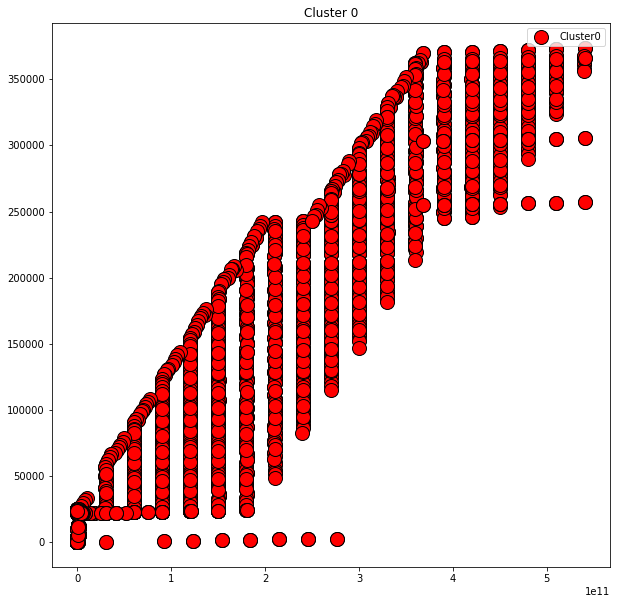

In [478]:
plt = plot_cluster(Xcluster["cluster0"], 0, ["event.duration", "network.bytes"])
plt.show()

# Cluster 1

In [331]:
Xcluster["cluster1"]

,destination.ip,destination.port,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,source.port,source.ip,network.transport,network.type
5908,172.31.91.217,22,110100,127,1009315722906,119060,257,8960,130,"34,179",193.146.78.93,tcp,ipv4
5912,192.168.17.11,"35,220",8364,86,990558153587,19448,212,11084,126,"5,671",192.168.17.17,tcp,ipv4
5914,192.168.17.13,"41,138",9180,98,990048914531,19312,210,10132,112,"5,671",192.168.17.17,tcp,ipv4
5917,192.168.17.11,"39,530",4488,66,982656016128,8976,132,4488,66,"8,500",192.168.17.18,tcp,ipv4
5918,192.168.17.14,"34,212",9316,100,990015868038,19992,220,10676,120,"5,671",192.168.17.17,tcp,ipv4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14912,192.168.17.11,"39,530",3672,54,798605167793,7344,108,3672,54,"8,500",192.168.17.18,tcp,ipv4
14913,192.168.17.13,"47,792",3672,54,798464049947,7344,108,3672,54,"8,500",192.168.17.18,tcp,ipv4
14914,192.168.17.14,"34,212",7240,76,810211186068,16520,182,9280,106,"5,671",192.168.17.17,tcp,ipv4
14916,192.168.17.14,"38,704",3672,54,798636588203,7344,108,3672,54,"8,500",192.168.17.18,tcp,ipv4


Destination IPs seem to be private IPs. Destination ports are most of them randomly generate ports and source ports are some of them well known from microservices, but other ones are not known.

In [332]:
print("Destination IPs: "+Xcluster["cluster1"]["destination.ip"].unique())
print("Destination Ports: "+Xcluster["cluster1"]["destination.port"].unique())
print("Source IPs: "+Xcluster["cluster1"]["source.ip"].unique())
print("Source Ports: "+Xcluster["cluster1"]["source.port"].unique())

['Destination IPs: 172.31.91.217' 'Destination IPs: 192.168.17.11'
 'Destination IPs: 192.168.17.13' 'Destination IPs: 192.168.17.14'
 'Destination IPs: 192.168.17.16']
['Destination Ports: 22' 'Destination Ports: 35,220'
 'Destination Ports: 41,138' 'Destination Ports: 39,530'
 'Destination Ports: 34,212' 'Destination Ports: 38,704'
 'Destination Ports: 45,834' 'Destination Ports: 36,274'
 'Destination Ports: 47,792']
['Source IPs: 193.146.78.93' 'Source IPs: 192.168.17.17'
 'Source IPs: 192.168.17.18']
['Source Ports: 34,179' 'Source Ports: 5,671' 'Source Ports: 8,500']


In [333]:
xcluster_numeric = Xcluster["cluster1"][name2]
xcluster_numeric = xcluster_numeric.astype("int64")
xcluster_numeric.describe()

,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets
count,163.000000,163.000000,1.630000e+02,163.000000,163.000000,163.000000,163.000000
mean,17110.662577,75.312883,8.844799e+11,24372.220859,166.294479,7261.558282,90.981595
std,30943.898893,19.901151,6.126974e+10,31621.471006,45.403259,2872.402728,28.371972
min,3400.000000,50.000000,7.369932e+11,6800.000000,100.000000,3400.000000,50.000000
25%,4080.000000,60.000000,8.400602e+11,8160.000000,120.000000,4080.000000,60.000000
50%,7104.000000,70.000000,8.906240e+11,16520.000000,180.000000,8552.000000,106.000000
75%,8154.000000,86.000000,9.301600e+11,18336.000000,200.000000,9805.000000,114.000000
max,110100.000000,127.000000,1.009316e+12,119060.000000,257.000000,11282.000000,130.000000


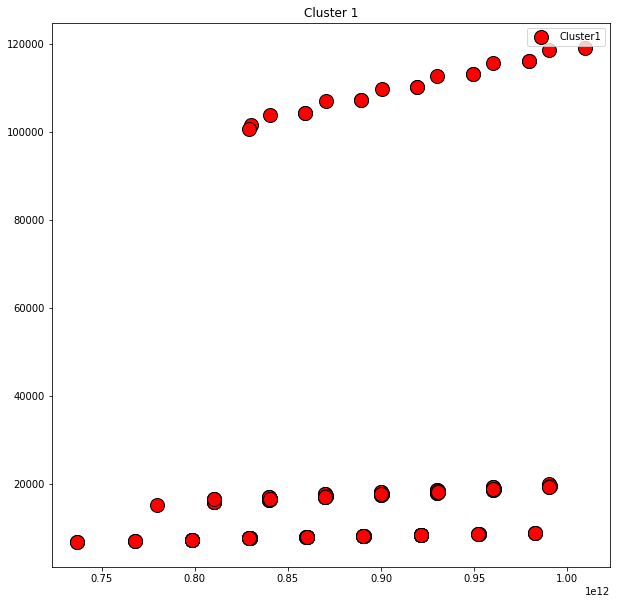

In [334]:
plt = plot_cluster(Xcluster["cluster1"], 1, ["event.duration", "network.bytes"])

What are those strange values, with high number of bytes send and received? Probably SSH connections, we are going to check it.

In [335]:
Xcluster["cluster1"]["network.bytes"] = Xcluster["cluster1"]["network.bytes"].astype("int64")
Xcluster["cluster1"][Xcluster["cluster1"]["network.bytes"] > 80000]

/Users/mikelamuchastegui/.conda/envs/Practica_1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,destination.ip,destination.port,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,source.port,source.ip,network.transport,network.type
5908,172.31.91.217,22,110100,127,1009315722906,119060,257,8960,130,"34,179",193.146.78.93,tcp,ipv4
6346,172.31.91.217,22,109732,126,990336234875,118624,255,8892,129,"34,179",193.146.78.93,tcp,ipv4
6736,172.31.91.217,22,107356,124,979296622881,116112,251,8756,127,"34,179",193.146.78.93,tcp,ipv4
7243,172.31.91.217,22,107356,124,979296622881,116112,251,8756,127,"34,179",193.146.78.93,tcp,ipv4
7706,172.31.91.217,22,106988,123,960320536656,115676,249,8688,126,"34,179",193.146.78.93,tcp,ipv4
8120,172.31.91.217,22,104668,121,949312758148,113220,245,8552,124,"34,179",193.146.78.93,tcp,ipv4
8610,172.31.91.217,22,104668,121,949312758148,113220,245,8552,124,"34,179",193.146.78.93,tcp,ipv4
9032,172.31.91.217,22,104300,120,930304229251,112784,243,8484,123,"34,179",193.146.78.93,tcp,ipv4
9408,172.31.91.217,22,101868,118,919296785469,110216,239,8348,121,"34,179",193.146.78.93,tcp,ipv4
9879,172.31.91.217,22,101868,118,919296785469,110216,239,8348,121,"34,179",193.146.78.93,tcp,ipv4


We were right!

Remaining packets seem to be internal microservices communications, by seeing the ports involved in the packets we can conclude that.

# Outliers

In [336]:
x_outlier_df

,destination.ip,destination.port,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,source.port,source.ip,network.transport,network.type
5902,192.168.17.18,"8,600",3985926,24422,1019299385197,6387412,48844,2401486,24422,"45,007",192.168.17.3,udp,ipv4
5909,34.238.162.185,"9,200",481836,512,1000096504160,2577544,1474,2095708,962,"38,310",172.21.0.2,tcp,ipv4
5910,34.238.162.185,"9,200",240918,256,1000096470634,1288772,737,1047854,481,"38,310",172.31.91.217,tcp,ipv4
5911,34.238.162.185,"9,200",17638166,5222,1005212950986,100557483,15791,82919317,10569,"40,992",172.31.91.217,tcp,ipv4
5913,192.168.17.11,"35,228",104212,1122,990558913664,293922,2244,189710,1122,"5,671",192.168.17.17,tcp,ipv4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14920,192.168.17.17,"5,671",16058,92,360093053270,37146,198,21088,106,"53,802",192.168.17.2,tcp,ipv4
14921,192.168.17.17,"5,671",55516,322,376821424294,87212,534,31696,212,"53,806",192.168.17.2,tcp,ipv4
14924,192.168.17.17,"5,671",243842,3440,369475556052,900142,8248,656300,4808,"53,820",192.168.17.2,tcp,ipv4
14925,192.168.17.17,"5,671",15212,74,359948610622,29720,132,14508,58,"53,844",192.168.17.2,tcp,ipv4


Destination IPs seem to be private IPs, except one of those that probably seems to be Elastic. Destination ports are some of them well known, whereas others are not known ports. Source IPs are all of them private. Source ports seem to be randomly generated ones.

In [337]:
print("Destination IPs: "+x_outlier_df["destination.ip"].unique())
print("Destination Ports: "+x_outlier_df["destination.port"].unique())
print("Source IPs: "+x_outlier_df["source.ip"].unique())
print("Source Ports: "+x_outlier_df["source.port"].unique())

['Destination IPs: 192.168.17.18' 'Destination IPs: 34.238.162.185'
 'Destination IPs: 192.168.17.11' 'Destination IPs: 192.168.17.13'
 'Destination IPs: 192.168.17.16' 'Destination IPs: 192.168.17.14'
 'Destination IPs: 192.168.17.17']
['Destination Ports: 8,600' 'Destination Ports: 9,200'
 'Destination Ports: 35,228' 'Destination Ports: 41,142'
 'Destination Ports: 45,838' 'Destination Ports: 34,218'
 'Destination Ports: 5,671' 'Destination Ports: 8,500'
 'Destination Ports: 36,274']
['Source IPs: 192.168.17.3' 'Source IPs: 172.21.0.2'
 'Source IPs: 172.31.91.217' 'Source IPs: 192.168.17.17'
 'Source IPs: 192.168.17.2' 'Source IPs: 192.168.17.11'
 'Source IPs: 192.168.17.18']
['Source Ports: 45,007' 'Source Ports: 38,310' 'Source Ports: 40,992'
 'Source Ports: 5,671' 'Source Ports: 53,802' 'Source Ports: 53,806'
 'Source Ports: 53,820' 'Source Ports: 53,844' 'Source Ports: 34,822'
 'Source Ports: 60,414' 'Source Ports: 8,500']


In [338]:
xoutlier_numeric = x_outlier_df[name2]
xoutlier_numeric = xoutlier_numeric.astype("int64")
xoutlier_numeric.describe()

,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets
count,2.670000e+02,267.000000,2.670000e+02,2.670000e+02,267.000000,2.670000e+02,267.000000
mean,1.635804e+06,3385.149813,7.218813e+11,7.981912e+06,7793.119850,6.346108e+06,4407.970037
std,4.265825e+06,5865.278438,2.242331e+11,2.419319e+07,12594.680211,1.999018e+07,6901.621361
min,2.388000e+03,32.000000,3.599486e+11,5.670000e+03,66.000000,3.264000e+03,34.000000
25%,2.219000e+04,176.000000,4.803482e+11,5.888400e+04,372.000000,3.494800e+04,196.000000
50%,1.042120e+05,512.000000,8.402568e+11,2.939220e+05,1474.000000,1.897100e+05,878.000000
75%,4.384100e+05,3968.000000,9.218579e+11,2.338771e+06,8260.000000,1.900361e+06,4814.000000
max,1.763817e+07,24422.000000,1.019299e+12,1.005575e+08,48844.000000,8.291932e+07,24422.000000


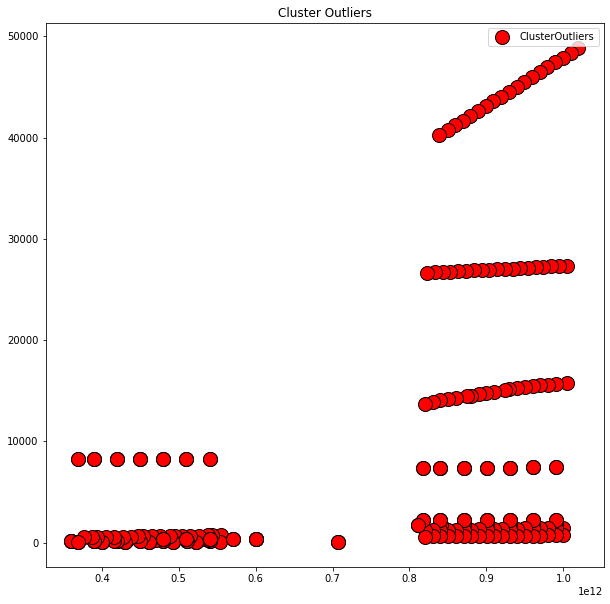

In [339]:
plt = plot_cluster(x_outlier_df, "Outliers", ["event.duration", "network.packets"])

# Cluster 0 vs Cluster 1

In [479]:
cluster_0_ports_ = Xcluster["cluster0"]
cluster_1 = Xcluster

# Clusters vs Outliers

In [480]:
X_clust_ports_info = X_clust[["destination.port", "source.port"]]
X_outlier_ports_info = x_outlier_df[["destination.port", "source.port"]]
cluster_outliers_similarities = X_clust_ports_info.merge(X_outlier_ports_info, how = 'inner' ,indicator=False, on=["destination.port", "source.port"])
cluster_outliers_similarities.drop_duplicates()

,destination.port,source.port
0,"36,274","8,500"


There is traffic in the clusters that originates in the port 36274 and goes to 8500. This same type of traffic is also unable to be clusterized and classified as outlier. We are going to ckeck why this happens.

In [481]:
columns = name2 + ["destination.port", "source.port"]
X_clust_numeric = X_clust[columns]
for i in range(len(columns)):
    X_clust_numeric[columns[i]].replace(',','',regex=True,inplace=True)

X_clust_numeric = X_clust_numeric.astype("int64")
X_clust_numeric[(X_clust_numeric["destination.port"] == 36274) & (X_clust_numeric["source.port"] == 8500)]

/Users/onintzaugarte/opt/anaconda3/envs/machinglearning/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,destination.port,source.port
5922,3944,58,860000530566,7888,116,3944,58,36274,8500
6360,3944,58,860000530566,7888,116,3944,58,36274,8500
6750,3944,58,860000530566,7888,116,3944,58,36274,8500
7257,3808,56,829503983546,7616,112,3808,56,36274,8500
7720,3808,56,829503983546,7616,112,3808,56,36274,8500
8135,3808,56,829503983546,7616,112,3808,56,36274,8500
8625,3672,54,798472777449,7344,108,3672,54,36274,8500
9047,3672,54,798472777449,7344,108,3672,54,36274,8500
9423,3672,54,798472777449,7344,108,3672,54,36274,8500
9894,3672,54,798472777449,7344,108,3672,54,36274,8500


In [482]:
columns = name2 + ["destination.port", "source.port"]
outlier_numeric = x_outlier_df[columns]
for i in range(len(columns)):
    outlier_numeric[columns[i]].replace(',','',regex=True,inplace=True)

outlier_numeric = outlier_numeric.astype("int64")
outlier_numeric[(outlier_numeric["destination.port"] == 36274) & (outlier_numeric["source.port"] == 8500)]

,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,destination.port,source.port
13271,3264,48,706623966234,6528,96,3264,48,36274,8500
13847,3264,48,706623966234,6528,96,3264,48,36274,8500
14918,3264,48,706623966234,6528,96,3264,48,36274,8500


There are very similar to the instances classified in the clusters, probably due to the parameters specified in the algorithm the instances are classified as outliers but we can say that probably they are not.

### OPTICS

In [157]:
# Clustering Optics
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import numpy as np

In [158]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X = scaler.fit_transform(X) 
  
# Normalizing the data so that the data 
# approximately follows a Gaussian distribution 
X = normalize(X) 
  
# Converting the numpy array into a pandas DataFrame 
X = pd.DataFrame(X) 
  
# Renaming the columns 
X.columns = X.columns 
  
X.head() 

,0,1,2,3,4,5,6
0,-0.323521,-0.294869,-0.734376,-0.286949,-0.271966,-0.226797,-0.247661
1,-0.220171,-0.277712,-0.834831,-0.194271,-0.253405,-0.152821,-0.228358
2,-0.323521,-0.294869,-0.734376,-0.286949,-0.271966,-0.226798,-0.247661
3,-0.218718,-0.274082,-0.836336,-0.194714,-0.251985,-0.154415,-0.228757
4,-0.323521,-0.294869,-0.734376,-0.286949,-0.271966,-0.226797,-0.247661


Building clustering model

In [159]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X = scaler.fit_transform(X) 

# Building the OPTICS Clustering model 
optics_model = OPTICS(min_samples = 90, xi = 0.05, min_cluster_size = 0.05) 
  
# Training the model 
op_model = optics_model.fit(X) 

Storing result of trainning

In [160]:
# Producing the labels according to the DBSCAN technique with eps = 0.5 
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                core_distances = optics_model.core_distances_, 
                                ordering = optics_model.ordering_, eps = 0.5) 

# Producing the labels according to the DBSCAN technique with eps = 2.0 
labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                core_distances = optics_model.core_distances_, 
                                ordering = optics_model.ordering_, eps = 2) 

# Creating a numpy array with numbers at equal spaces till 
# the specified range 
space = np.arange(len(X)) 

# Storing the reachability distance of each point 
reachability = optics_model.reachability_[optics_model.ordering_] 

# Storing the cluster labels of each point 
labels = optics_model.labels_[optics_model.ordering_] 

#print(labels) 



Plot result

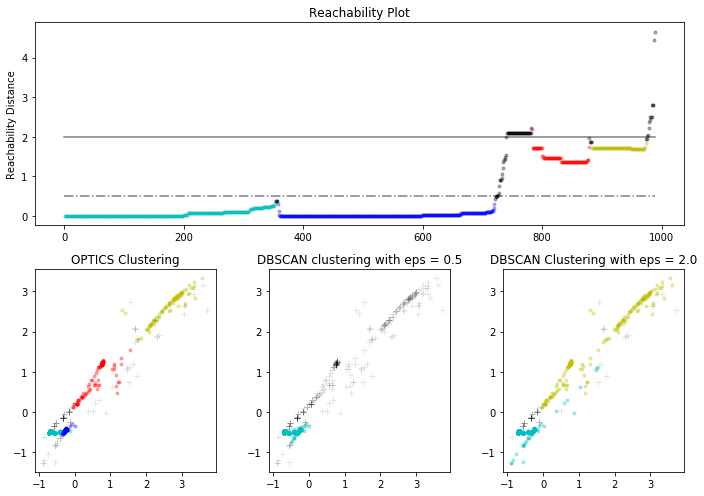

In [161]:
# Defining the framework of the visualization 
X = pd.DataFrame(X)
plt.figure(figsize =(10, 7)) 
G = gridspec.GridSpec(2, 3) 
ax1 = plt.subplot(G[0, :]) 
ax2 = plt.subplot(G[1, 0]) 
ax3 = plt.subplot(G[1, 1]) 
ax4 = plt.subplot(G[1, 2]) 
  
# Plotting the Reachability-Distance Plot 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = space[labels == Class] 
    Rk = reachability[labels == Class] 
    ax1.plot(Xk, Rk, colour, alpha = 0.3) 
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3) 
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5) 
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5) 
ax1.set_ylabel('Reachability Distance') 
ax1.set_title('Reachability Plot') 
  
# Plotting the OPTICS Clustering 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = X[optics_model.labels_ == Class] 
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
      
ax2.plot(X.iloc[optics_model.labels_ == -1, 0], 
         X.iloc[optics_model.labels_ == -1, 1], 
       'k+', alpha = 0.1) 
ax2.set_title('OPTICS Clustering') 
  
# Plotting the DBSCAN Clustering with eps = 0.5 
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow'] 
for Class, colour in zip(range(0, 6), colors): 
    Xk = X[labels1 == Class] 
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.') 
        
ax3.plot(X.iloc[labels1 == -1, 0], 
        X.iloc[labels1 == -1, 1], 
       'k+', alpha = 0.1) 
ax3.set_title('DBSCAN clustering with eps = 0.5') 
  
# Plotting the DBSCAN Clustering with eps = 2.0 
colors = ['c.', 'y.', 'm.', 'g.'] 
for Class, colour in zip(range(0, 4), colors): 
    Xk = X.iloc[labels2 == Class] 
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
          
ax4.plot(X.iloc[labels2 == -1, 0], 
        X.iloc[labels2 == -1, 1], 
       'k+', alpha = 0.1) 
ax4.set_title('DBSCAN Clustering with eps = 2.0') 
  
  
plt.tight_layout() 
plt.show()



### HDBSCAN

In [162]:
import hdbscan

X_standarized = StandardScaler().fit_transform(X)



ModuleNotFoundError: No module named 'hdbscan'

In [ ]:

# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_standarized = scaler.fit_transform(X) 
  
# Normalizing the data so that the data 
# approximately follows a Gaussian distribution 
X_normal = normalize(X_standarized) 
  
    
# Converting the numpy array into a pandas DataFrame 
X_df = pd.DataFrame(X_normal) 
  

X_df.head() 

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(X_df)


In [ ]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=80, 
                                      edge_linewidth=0.5)

In [ ]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)